In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
df.head(5)

2023-03-13 11:03:03.093470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 11:03:03.093505: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 11:03:04.015907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-13 11:03:04.016041: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-13 11:03:04.016062: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
### Data conversion for network perception

# Replacing NaN Age with mean
# Replacing another NaN by ffill

mean_age = df[["Age"]].mean()

df = df.fillna({'Age':mean_age})
df = df.fillna(method = "ffill")

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [3]:
# Replacing "Embarked" and "Sex" columns with integer  encoding

label_encoder = preprocessing.LabelEncoder()

df['gender_type'] = label_encoder.fit_transform(df["Sex"])
df['embark_type'] = label_encoder.fit_transform(df["Embarked"])

# Delete unsable features

del df['Ticket']
del df['Sex']
del df['Embarked']
del df['Cabin']
del df['Name']

df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2
5,6,0,3,35.0,0,0,8.4583,1,1
6,7,0,1,54.0,0,0,51.8625,1,2
7,8,0,3,2.0,3,1,21.0750,1,2
8,9,1,3,27.0,0,2,11.1333,0,2
9,10,1,2,14.0,1,0,30.0708,0,0


In [4]:
# Extract Survived feature as target array

y = df['Survived']
del df['Survived']
 

In [5]:
# Convert all to [0 - 1] 

for i in df.columns:
    a = max(df[i])
    b = min(df[i])
    df[i] = (df[i] - b) / a
    
df.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,0.000000,0.666667,0.26975,0.125,0.000000,0.014151,1.0,1.0
1,0.001122,0.000000,0.46975,0.125,0.000000,0.139136,0.0,0.0
2,0.002245,0.666667,0.31975,0.000,0.000000,0.015469,0.0,1.0
3,0.003367,0.000000,0.43225,0.125,0.000000,0.103644,0.0,1.0
4,0.004489,0.666667,0.43225,0.000,0.000000,0.015713,1.0,1.0
5,0.005612,0.666667,0.43225,0.000,0.000000,0.016510,1.0,0.5
6,0.006734,0.000000,0.66975,0.000,0.000000,0.101229,1.0,1.0
7,0.007856,0.666667,0.01975,0.375,0.166667,0.041136,1.0,1.0
8,0.008979,0.666667,0.33225,0.000,0.333333,0.021731,0.0,1.0
9,0.010101,0.333333,0.16975,0.125,0.000000,0.058694,0.0,0.0


In [7]:
# Train/test splitting

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 13)

# Build network model

model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(.75),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

2023-03-13 11:04:18.335292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-13 11:04:18.335326: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 11:04:18.335353: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a-370R4E-370R4-370R5E-3570RE-370R5V): /proc/driver/nvidia/version does not exist


In [8]:
# Fit it!

history = model.fit(x_train,
                    y_train,
                    epochs = 60,
                    batch_size = 32,
                    validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

Epoch 1/60
23/23 [==============================] - 2s 21ms/step - loss: 0.6327 - accuracy: 0.5969 - val_loss: 0.5617 - val_accuracy: 0.6145
Epoch 2/60
23/23 [==============================] - 0s 6ms/step - loss: 0.5837 - accuracy: 0.6896 - val_loss: 0.4857 - val_accuracy: 0.8156
Epoch 3/60
23/23 [==============================] - 0s 6ms/step - loss: 0.5354 - accuracy: 0.7767 - val_loss: 0.4460 - val_accuracy: 0.8212
Epoch 4/60
23/23 [==============================] - 0s 6ms/step - loss: 0.5178 - accuracy: 0.7921 - val_loss: 0.4451 - val_accuracy: 0.8212
Epoch 5/60
23/23 [==============================] - 0s 6ms/step - loss: 0.5081 - accuracy: 0.7626 - val_loss: 0.4287 - val_accuracy: 0.8045
Epoch 6/60
23/23 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 0.7767 - val_loss: 0.4238 - val_accuracy: 0.8045
Epoch 7/60
23/23 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.7809 - val_loss: 0.4171 - val_accuracy: 0.8101
Epoch 8/60
23/23 [=

23/23 [==============================] - 0s 6ms/step - loss: 0.4287 - accuracy: 0.8118 - val_loss: 0.4314 - val_accuracy: 0.8324
Epoch 60/60
23/23 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8188 - val_loss: 0.4247 - val_accuracy: 0.8212


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

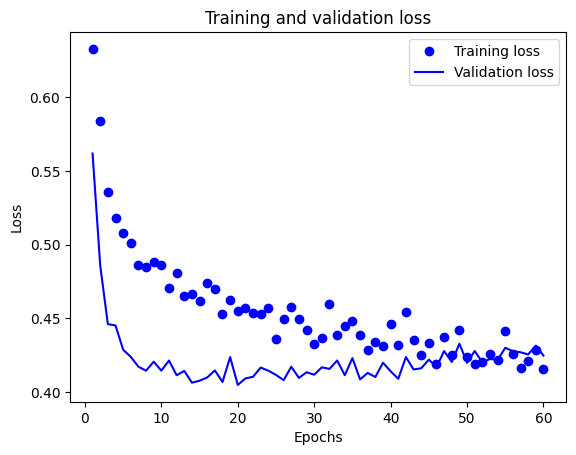

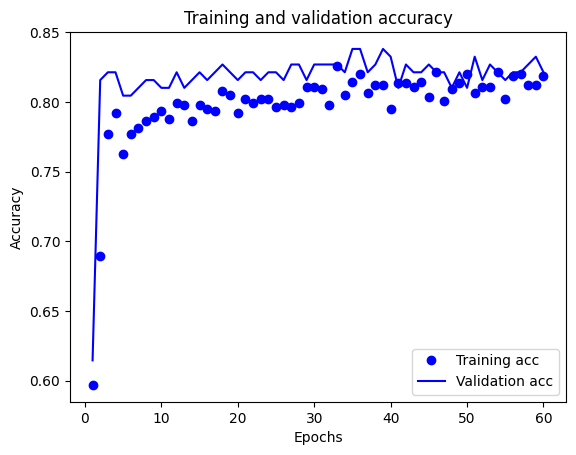

In [9]:
# Visualization of training process, epoch/loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of training process, epoch/accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [10]:
# Prediction and accuracy

pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

6/6 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8212
test_acc: 0.8212290406227112


In [11]:
# Optimal metric of success

p = np.around(pred)
recall_score(y_test, p)


0.7246376811594203